# Michael Navarro: Capstone

## Context

For my capstone I decided to analyze a Pokemon based dataset. The dataset includes an abundant amount of features for each particular Pokemon.
A full list of features with a brief description will follow shortly. The objective of this notebook is to see if it is possible to accurately determine if a Pokemon can be classified as a "Legendary" Pokemon or not.

The reason I chose this dataset is rather silly if I am being honest. I have been a long time Pokemon fan since my early years and continue to be one.
As such, I also happen to know how competetive the Pokemon battle scene can be and the extent that GameFreak, the developer, goes through with the hopes of balancing the over 1,000 Pokemon and their respective forms. Knowing that they do take the time to balance out the stats of each Pokemon, I began to wonder if it was possible to be able to determine if a Pokemon was considered Legendary based on a number of their features. In doing so, I would like to know what actually makes a Pokemon "Legendary". 

Using my "insider" knowledge and the knowledge I have accrued throughout the semester, I hope to gain some insight as to the inner workings of Pokemon.

## Dataset

<pre>
---------- Features ----------

Number:                     Number of the Pokemon in the National Pokedex
Name:                       Name of the Pokemon
Type 1:                     Primary Type of the Pokemon
Type 2:                     Secondary Type of the Pokemon
Abilities:                  A list that contains the abilities of the Pokemon
HP:                         Base Hit Points stat of the Pokemon
Att:                        Base Attack stat of the Pokemon
Def:                        Base Defense stat of the Pokemon
Spa:                        Base Special Attack stat of the Pokemon
Spd:                        Base Special Defense stat of the Pokemon
Spe:                        Base Speed stat of the Pokemon
BST:                        Sum of all the base stats
Mean:                       Mean of the base stats
Standard Deviation:         Standard deviation of the base stats
Generation:                 The Generation in which the Pokemon was introduced
Experience Type:            The Experience Group to which the Pokemon belongs
Experience to level 100:    Amount of experience the Pokemon needs to level up to 100
Final Evolution:            Denotes if the Pokemon is a Final Evolution
Catch Rate:                 Catch Rate of the Pokemon
Mega Evolution:             Denotes if the Pokemon is a Mega Evolution
Alolan Form:                Denotes if the Pokemon is an Alolan Form
Galarian Form:              Denotes if the Pokemon is a Galarian Form
Against *:                  Effectiveness of certain type against the Pokemon
</pre>



<pre>
---------- Label ----------

Legendary: Denotes if the Pokemon is Legendary
</pre>

## Notebook Imports & Globals

In [1]:
#----------------------------------------------------------------------------------------
#                                       Imports 
#----------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

#----------------------------------- sklearn imports -----------------------------------
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml

#----------------------------------------------------------------------------------------
#                                   Global Constants
#----------------------------------------------------------------------------------------
# Relative path to dataset
POKEDEX_PATH = 'pokedex.csv'

## Load Dataset

In [2]:
# Load Pokedex dataset
pokedex = pd.read_csv(POKEDEX_PATH)

## Data Exploration

Let us start by looking at a few of the first rows. As we can see, there is a lot of information for each row, but I can tell already that we can get rid of some of the columns.

In [3]:
pokedex.head()

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


Lets take a look at the data types of each column and see if any null values exist.

In [4]:
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

It is apparent that there exists a lot of null values, however this doesn't mean that those missing values will cause problems and need to be dropped. For example, the type_2 column having a null value is perfectly acceptable. Not all Pokemon have a second type. 

Moving on, we will take a look at the statistical breakdown of all the numerical columns.

In [5]:
pokedex.describe()

,Number,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,...,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,439.226744,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,...,1.002180,1.239826,1.025678,0.974806,1.074855,0.992006,1.094234,1.286822,71.879845,136.735756
std,261.871350,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,...,0.613111,0.699361,0.577269,0.378040,0.475292,0.511859,0.535159,1.391501,132.872741,3111.666658
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,211.750000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,434.500000,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,667.250000,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.275000,42.200000
max,898.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


## Pre-Process Dataset

Before we proceed manipulating the Pokedex dataframe, we will make a deep copy of it. The reason for a deep copy is because some of the values are objects. When doing a shallow copy, some of the links behind the scenes between copies of a dataframe will still point to the original.

The objective of our pre-processing will be to make a minimalistic version of the Pokedex dataframe using our "insider" knowledge and some deductive reasoning skills. For example, I know that the against_* columns won't be beneficial because those are tied to the type_* columns. This makes the against_* columns redundant and exhaustive if we were to process them. Another example are the additional name columns. I doubt any name coulmn is even necessary, but we will leave the english one in so we have a name to refer to for each entry.

In [6]:
# Declare our min(imalistic) pokedex copy
min_pokedex = pokedex.copy(deep=True)

We will now drop redundant or unhelpful columns based either on our topic based knowledge or through deductive reasoning.

In [7]:
# Drop any columns with substring "Against"
# These columns are tied directly to a Pokemon's typing making them redundant information
min_pokedex.drop(list(min_pokedex.filter(regex='Against')), axis=1, inplace=True)

# Drop any columns with substring "Abilities"
# Often times, Legendaries have unique abilities
min_pokedex.drop(list(min_pokedex.filter(regex='Abilities')), axis=1, inplace=True)

# Drop any columns with substring "Number"
# Canon indexing, not useful
min_pokedex.drop(list(min_pokedex.filter(regex='Number')), axis=1, inplace=True)

# Drop any columns with substring "Mega"
# Mega evolution of a Pokemon, does not change their status of Legendary or not, not useful
min_pokedex.drop(list(min_pokedex.filter(regex='Mega')), axis=1, inplace=True)

# Drop any columns with substring "Form"
# Like Mega evolution of a Pokemon, does not change their status of Legendary or not, not useful
min_pokedex.drop(list(min_pokedex.filter(regex='Form')), axis=1, inplace=True)

min_pokedex.head()

,Name,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,...,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Height,Weight,BMI
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,318,...,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.7,6.9,14.1
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,405,...,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,1.0,13.0,13.0
2,Venusaur,Grass,Poison,80,82,83,100,100,80,525,...,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,2.0,100.0,25.0
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,625,...,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,2.4,155.5,27.0
4,Charmander,Fire,NaN,39,52,43,60,50,65,309,...,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.6,8.5,23.6


Let us take a look at the remaining columns and the statistical breakdown of the numerical columns.

In [8]:
min_pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1032 non-null   object 
 1   Type 1                   1032 non-null   object 
 2   Type 2                   548 non-null    object 
 3   HP                       1032 non-null   int64  
 4   Att                      1032 non-null   int64  
 5   Def                      1032 non-null   int64  
 6   Spa                      1032 non-null   int64  
 7   Spd                      1032 non-null   int64  
 8   Spe                      1032 non-null   int64  
 9   BST                      1032 non-null   int64  
 10  Mean                     1032 non-null   float64
 11  Standard Deviation       1032 non-null   float64
 12  Generation               1032 non-null   float64
 13  Experience type          1032 non-null   object 
 14  Experience to level 100 

To avoid any possible issues down the line, we will only take into account the first type.

In [9]:
# Drop any type columns
# Almot half of the entries do not have a second type
# Eliminating one type column means we should eliminate the other due to interchangeability
# In other words, may skew data
min_pokedex.drop(list(min_pokedex.filter(regex='Type')), axis=1, inplace=True)

In [10]:
min_pokedex.describe()

,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience to level 100,Final Evolution,Catch Rate,Legendary,Height,Weight,BMI
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1.032000e+03,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,69.906008,80.526163,74.609496,72.918605,72.139535,68.548450,438.648256,73.108043,20.028104,4.432171,1.061362e+06,0.564922,93.879845,0.121124,1.286822,71.879845,136.735756
std,26.189155,32.542374,30.905972,32.773495,27.625876,30.219526,120.675545,20.112591,10.830298,2.263713,1.570876e+05,0.496008,76.316071,0.326430,1.391501,132.872741,3111.666658
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,6.000000e+05,0.000000,3.000000,0.000000,0.100000,0.100000,0.000000
25%,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.801910,3.000000,1.000000e+06,0.000000,45.000000,0.000000,0.600000,9.000000,18.600000
50%,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,459.000000,76.500000,18.484228,5.000000,1.000000e+06,1.000000,60.000000,0.000000,1.000000,29.750000,28.350000
75%,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.835709,6.000000,1.250000e+06,1.000000,127.000000,0.000000,1.600000,71.275000,42.200000
max,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,1.640000e+06,1.000000,255.000000,1.000000,20.000000,999.900000,99990.000000


Let us take a closer look at our label and see what all the possible values can be.

In [11]:
# Number of unique values per column
print(min_pokedex.nunique())

Name                       1032
HP                          103
Att                         123
Def                         113
Spa                         119
Spd                         106
Spe                         127
BST                         215
Mean                        215
Standard Deviation          725
Generation                    8
Experience type               6
Experience to level 100       6
Final Evolution               2
Catch Rate                   34
Legendary                     2
Height                       60
Weight                      473
BMI                         501
dtype: int64


Now let us take a peek at the Pokemon that are Legendary

In [12]:
min_pokedex.query("Legendary == 1")

,Name,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Height,Weight,BMI
182,Articuno,90,85,100,95,125,85,580,96.666667,13.743685,1.0,Slow,1250000,1.0,3,1.0,1.7,55.4,19.2
183,Galarian Articuno,90,85,85,125,100,95,580,96.666667,13.743685,8.0,Slow,1250000,1.0,3,1.0,1.7,50.9,17.6
184,Zapdos,90,90,85,125,90,100,580,96.666667,13.437096,1.0,Slow,1250000,1.0,3,1.0,1.6,52.6,20.5
185,Galarian Zapdos,90,125,90,85,90,100,580,96.666667,13.437096,8.0,Slow,1250000,1.0,3,1.0,1.6,58.2,22.7
186,Moltres,90,100,90,125,85,90,580,96.666667,13.437096,1.0,Slow,1250000,1.0,3,1.0,2.0,60.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,Glastrier,100,145,130,65,110,30,580,96.666667,38.908725,8.0,Slow,1250000,1.0,3,1.0,2.2,800.0,165.3
1028,Spectrier,100,65,60,145,80,130,580,96.666667,31.841622,8.0,Slow,1250000,1.0,3,1.0,2.0,44.5,11.1
1029,Calyrex,100,80,80,80,80,80,500,83.333333,7.453560,8.0,Slow,1250000,1.0,3,1.0,1.1,7.7,6.4
1030,Calyrex Ice Rider,100,165,150,85,130,50,680,113.333333,39.334746,8.0,Slow,1250000,1.0,3,1.0,2.4,809.1,140.5


As we can see there aren't very many Legendary Pokemon. In fact, less than 10% of Pokemon are Legendary.

In [13]:
# Swap Legendary and Name Columns for data exploration
# !---------- Only Run Cell Once Per Notebook Runtime ----------!
cols = list(min_pokedex.columns)
a, b = cols.index('Legendary'), cols.index('Name')
cols[b], cols[a] = cols[a], cols[b]
min_pokedex = min_pokedex[cols]

min_pokedex.head()

,Legendary,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Name,Height,Weight,BMI
0,0.0,45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,Bulbasaur,0.7,6.9,14.1
1,0.0,60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,Ivysaur,1.0,13.0,13.0
2,0.0,80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,Venusaur,2.0,100.0,25.0
3,0.0,80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,Mega Venusaur,2.4,155.5,27.0
4,0.0,39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,Charmander,0.6,8.5,23.6


At this point I think we have pre-processed our data to a minimalistic, but still usable level. Let us proceed with the visualization of the data.

## Visualize Dataset

For the visualization process, we will encode the non numerical data.

In [14]:
encoded_min_pokdex = min_pokedex.copy(deep=True)

#encoding non-numerical variables
df_Encoded = encoded_min_pokdex.select_dtypes(exclude=[np.number]).columns

label_encoder = LabelEncoder()

for i in df_Encoded:
    # Skip the Name field
    if i != 'Name':
        encoded_min_pokdex[i] = label_encoder.fit_transform(encoded_min_pokdex[i])
    # end if
# end for

In [15]:
encoded_min_pokdex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Legendary                1032 non-null   float64
 1   HP                       1032 non-null   int64  
 2   Att                      1032 non-null   int64  
 3   Def                      1032 non-null   int64  
 4   Spa                      1032 non-null   int64  
 5   Spd                      1032 non-null   int64  
 6   Spe                      1032 non-null   int64  
 7   BST                      1032 non-null   int64  
 8   Mean                     1032 non-null   float64
 9   Standard Deviation       1032 non-null   float64
 10  Generation               1032 non-null   float64
 11  Experience type          1032 non-null   int32  
 12  Experience to level 100  1032 non-null   int64  
 13  Final Evolution          1032 non-null   float64
 14  Catch Rate              

<AxesSubplot:>

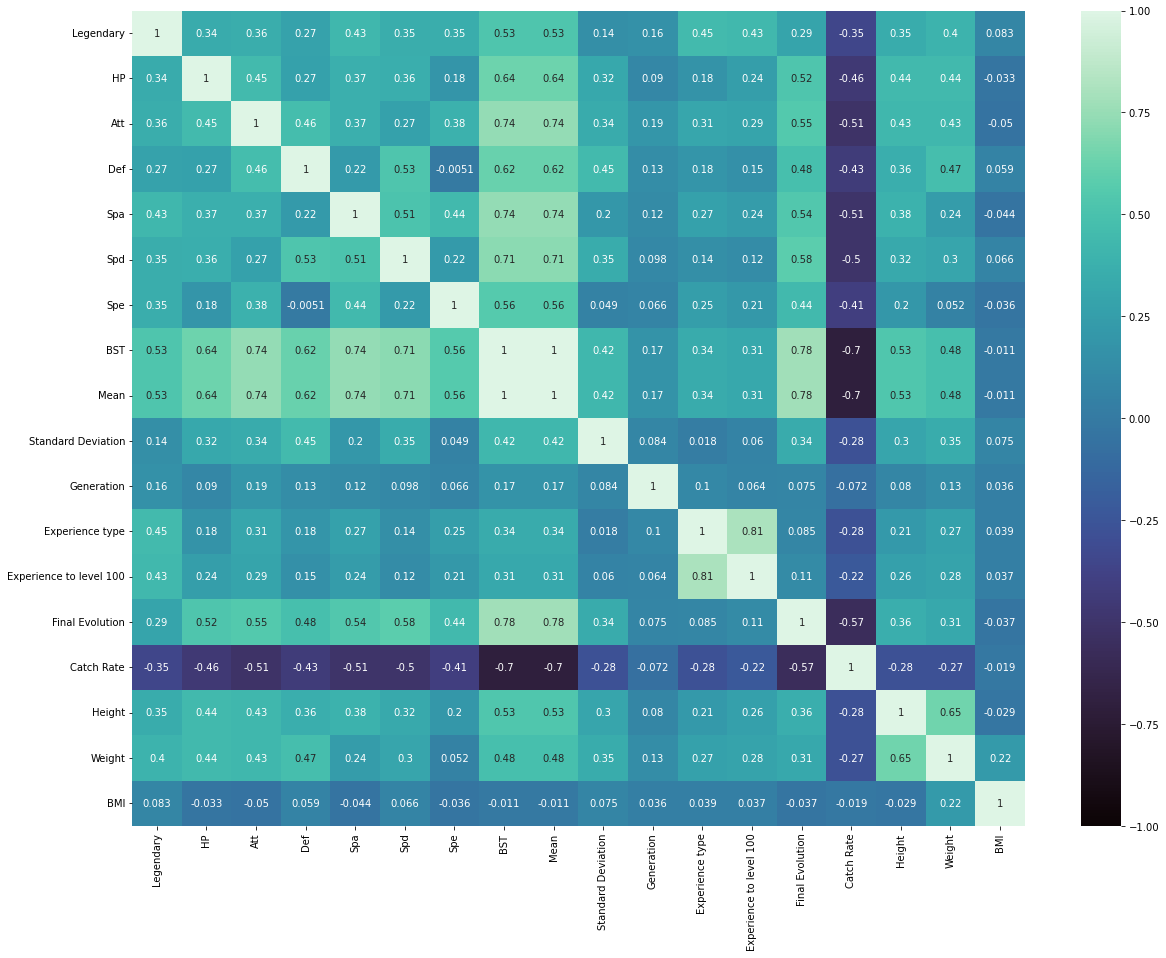

In [16]:
corr = encoded_min_pokdex.corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='mako')

---
! During Testing !

The most interesting thing about the correlation map is that it shows the 'name' feature has a higher correlation than other numerical features. This feature will of course not be taken into account when modeling, because, as previously stated, the name feature is not a universal feature of a Pokemon and is abstractly related.

---

In the Following Code snippet we will min max scale the dataframe. However, I have always been curious to see what side effects there are when scaling data firsthand. As such, we will be comparing the correlation values before scaling and after scaling by calculating the delta between the two values.

In [17]:
scaled_encoded_min_pokdex = encoded_min_pokdex.copy(deep=True)

# scale data
for col in scaled_encoded_min_pokdex.columns:
    if col != 'Name':
        scaled_encoded_min_pokdex[col] = (scaled_encoded_min_pokdex[col]-scaled_encoded_min_pokdex[col].min())/(scaled_encoded_min_pokdex[col].max()-scaled_encoded_min_pokdex[col].min())

# Get the correlation values for the filled in dataframe
corr2 = scaled_encoded_min_pokdex.corr(method='pearson')

# Calculate the delta of the correlation value before and after filling in the Null values.
print(f'{"Feature":<25}{"Not Scaled":<25}{"Scaled":<25}{"Delta"}')
print('-' * 100)
for feat in corr2['Legendary'].keys():
    delta = abs(corr["Legendary"][feat]) - abs(corr2["Legendary"][feat])
    print(f'{feat:<25}{corr["Legendary"][feat]:<25}{corr2["Legendary"][feat]:<25}{abs(delta)}')

Feature                  Not Scaled               Scaled                   Delta
----------------------------------------------------------------------------------------------------
Legendary                1.0                      1.0                      0.0
HP                       0.3409090879426838       0.34090908794268365      1.6653345369377348e-16
Att                      0.35675623523736705      0.35675623523736677      2.7755575615628914e-16
Def                      0.2735998295524753       0.2735998295524763       9.992007221626409e-16
Spa                      0.42912282162159643      0.4291228216215965       5.551115123125783e-17
Spd                      0.35284465303284906      0.3528446530328492       1.1102230246251565e-16
Spe                      0.35440714842074283      0.3544071484207433       4.440892098500626e-16
BST                      0.5263303200068754       0.526330320006876        5.551115123125783e-16
Mean                     0.5263303200068761       0.52633

After scaling, we can see that there is a very small change in the correlation values. Considering this, we will continue on with the scaled data as it makes it easier to visualize and process. Furthermore, it will eliminate any kind of scaling bias.

In [18]:
final_pokedex = scaled_encoded_min_pokdex.copy(deep=True)

for feat in corr2['Legendary'].keys():
    if corr2['Legendary'][feat] < 0.1:
        print(f'Dropping: {feat}')
        final_pokedex.drop([feat], axis=1, inplace=True)
# end for 

final_pokedex.drop('Name', axis=1, inplace=True)

print()
final_pokedex.info()

Dropping: Catch Rate
Dropping: BMI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Legendary                1032 non-null   float64
 1   HP                       1032 non-null   float64
 2   Att                      1032 non-null   float64
 3   Def                      1032 non-null   float64
 4   Spa                      1032 non-null   float64
 5   Spd                      1032 non-null   float64
 6   Spe                      1032 non-null   float64
 7   BST                      1032 non-null   float64
 8   Mean                     1032 non-null   float64
 9   Standard Deviation       1032 non-null   float64
 10  Generation               1032 non-null   float64
 11  Experience type          1032 non-null   float64
 12  Experience to level 100  1032 non-null   float64
 13  Final Evolution          1032 non-null   f

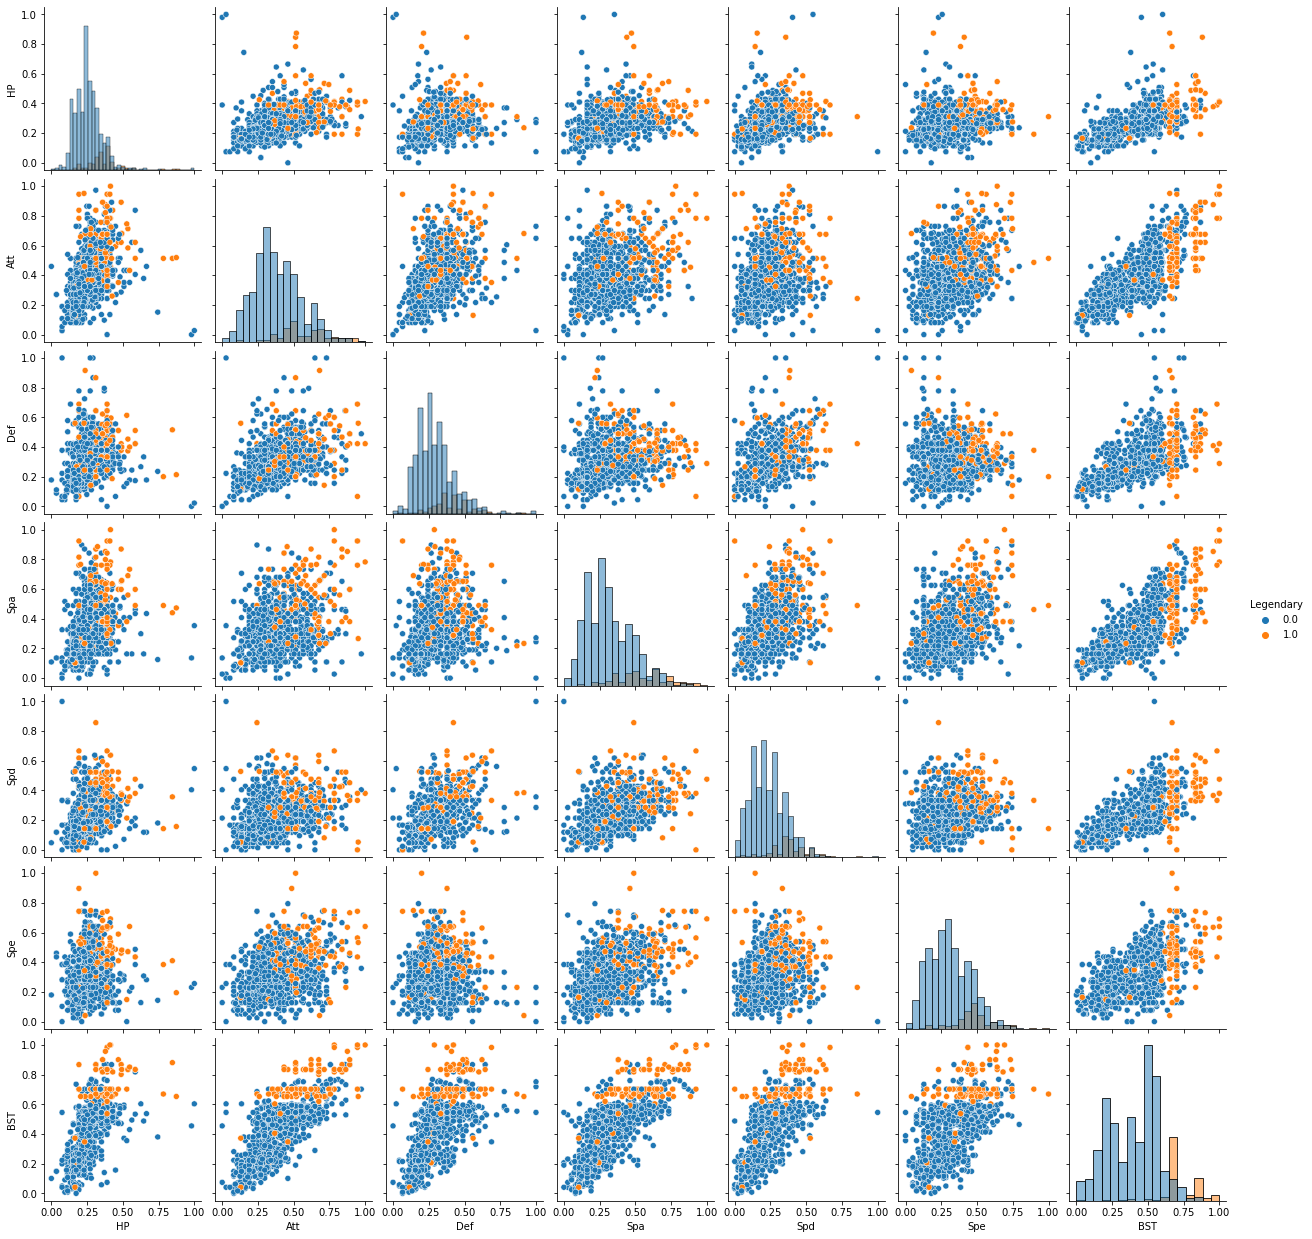

In [19]:
# Take the first 8 columns and use the first column (Legendary) as the hue variable
# Using iloc, we can take slices of the rows and columns.
# [:, :8] = All Rows and Columns 0-8
sns.pairplot(final_pokedex.iloc[:, :8], kind='scatter', diag_kind='hist', hue='Legendary')

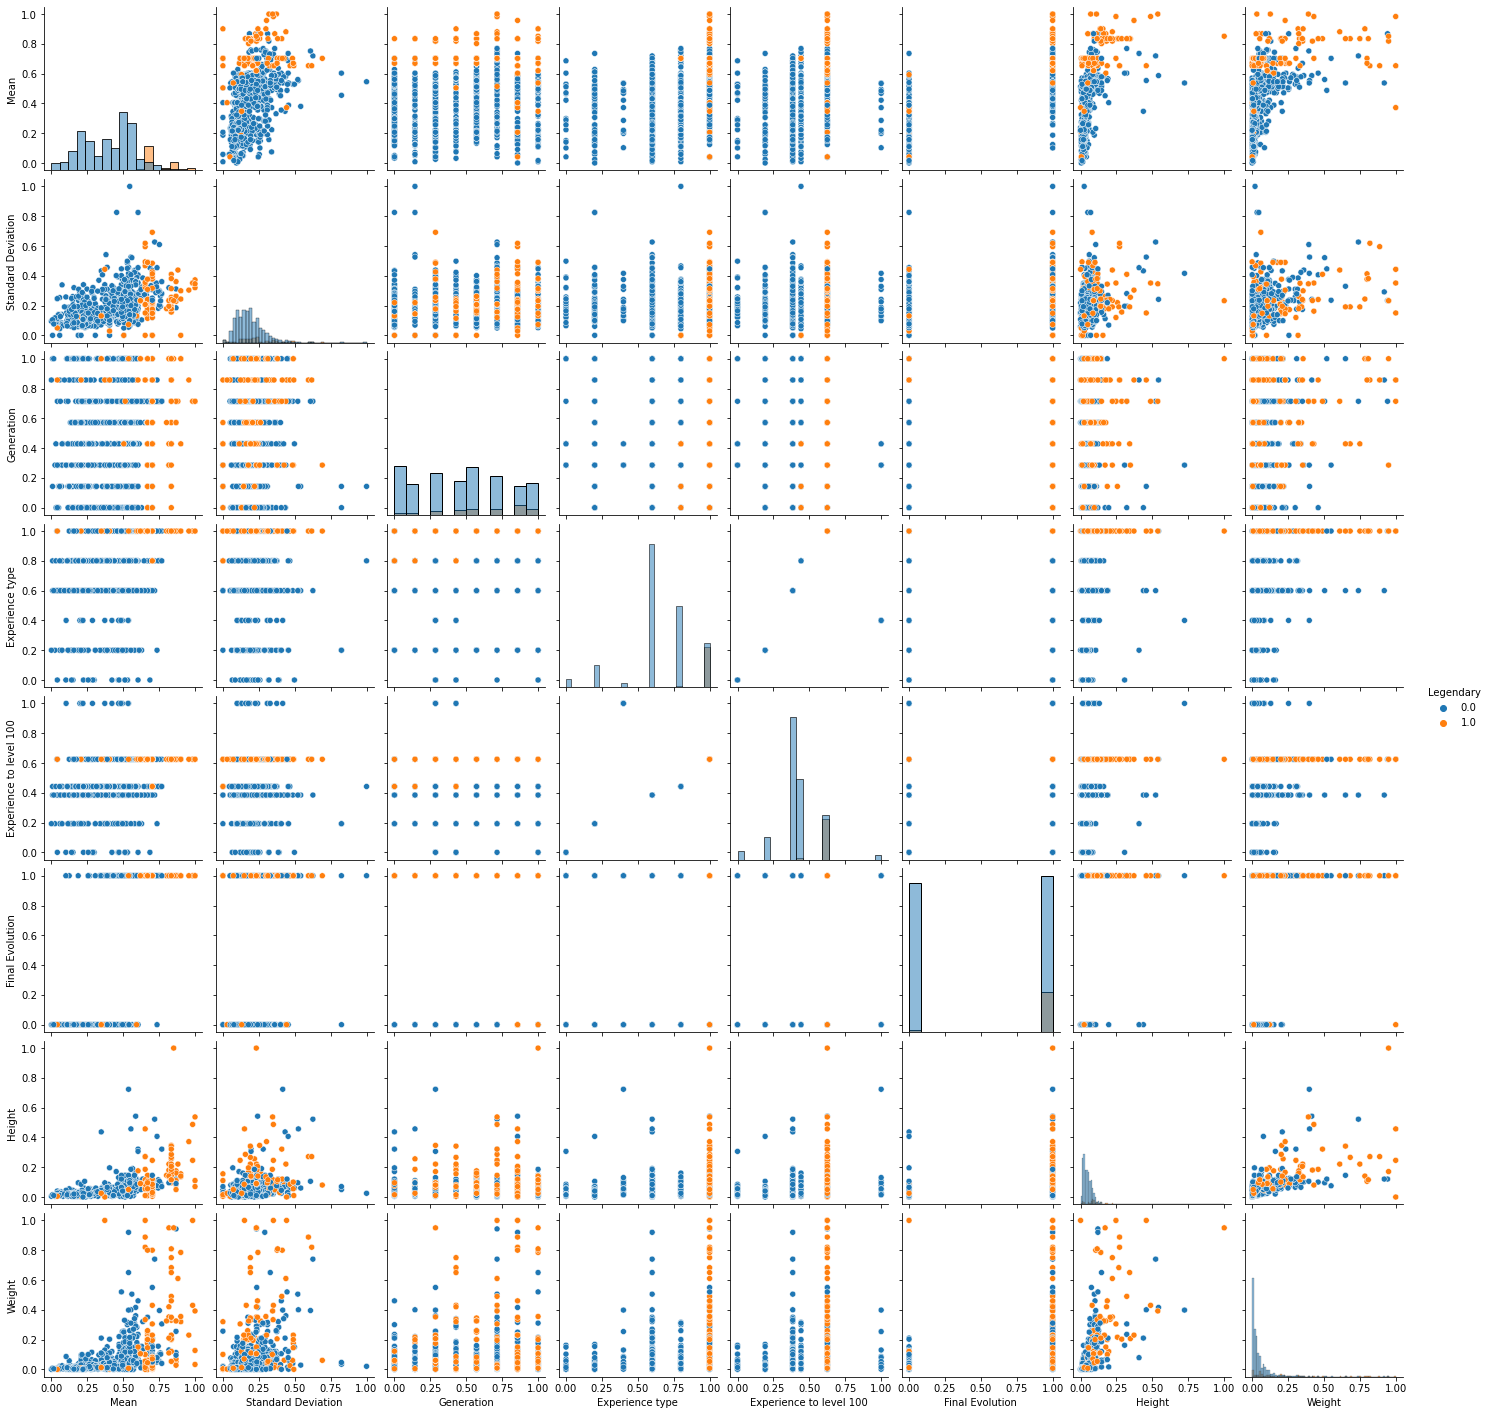

In [20]:
# In order to include the target back we must do a slice concatenation using np.r_
# Without this little trick we have to do a lot more column manipulation
sns.pairplot(final_pokedex.iloc[:, np.r_[0, 8:16]], kind='scatter', diag_kind='hist', hue='Legendary')

The next thing we will take a look at is if there are any relationships between the different stats.

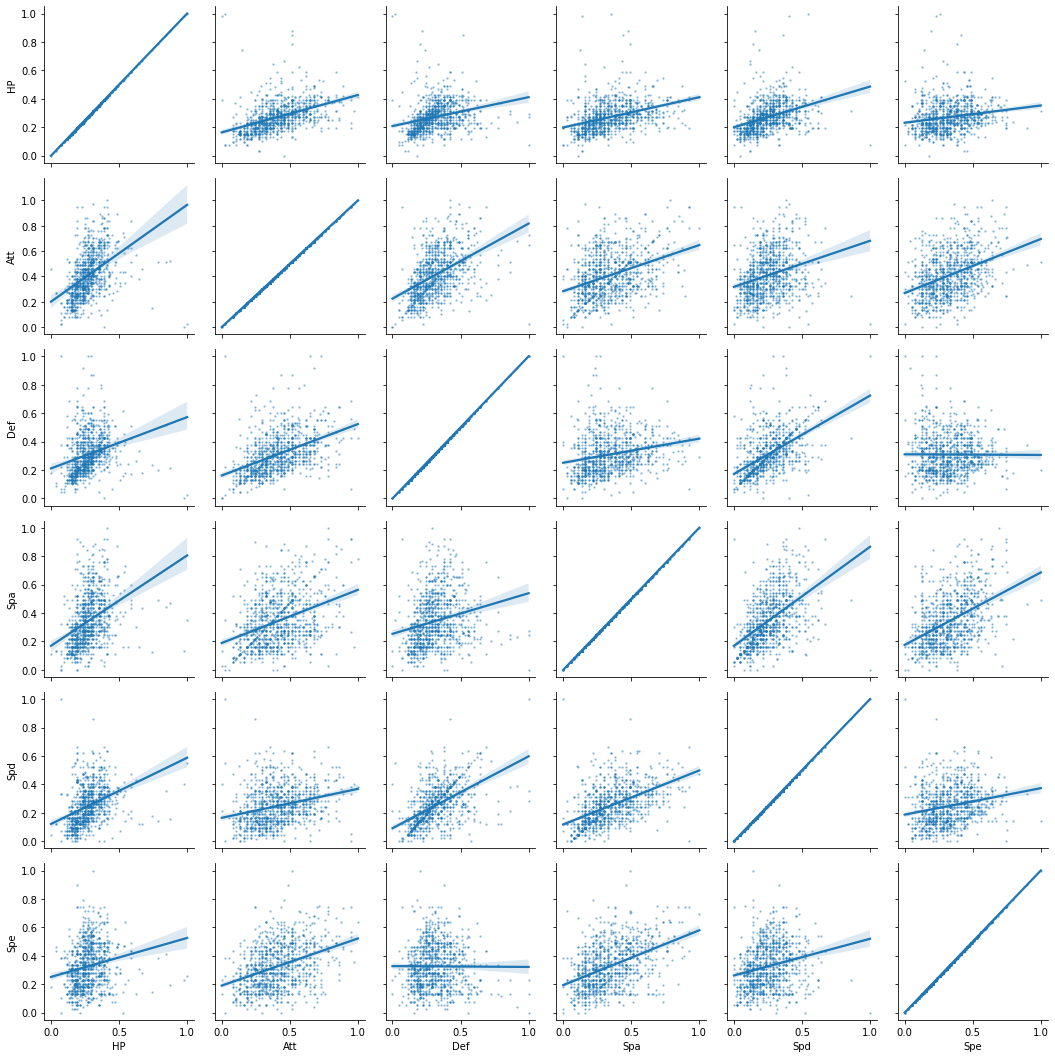

In [21]:
pokemon_stats = final_pokedex[['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]

stat_reg_plt = sns.PairGrid(pokemon_stats)
stat_reg_plt.map(sns.regplot, scatter_kws={'alpha': 0.35,'s':2})
plt.show()
plt.close()

---
The following visualizations are done using the unchanged original dataframe. The reason for this is that they deal with the typing of a pokemon.

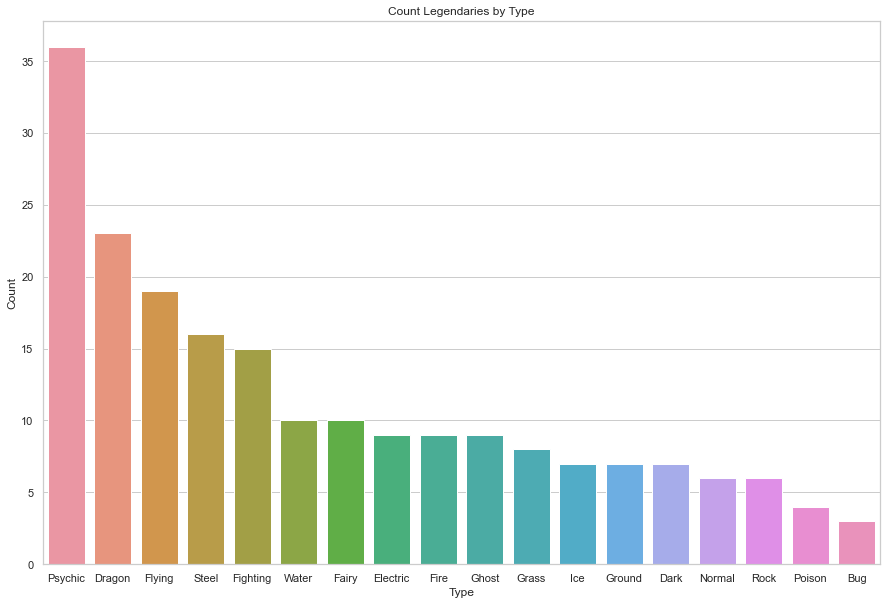

In [22]:
# Create a series with a count for each type for each legendary 
type1 = pokedex[pokedex['Legendary']==1]['Type 1'].value_counts() 
type2 = pokedex[pokedex['Legendary']==1]['Type 2'].value_counts() 

# Add the values for both type features
# This is needed because the order of types does not matter when considering the type of a Pokemon
legends_per_type = pd.DataFrame(type1.add(type2, fill_value=0))
legends_per_type = legends_per_type.reset_index()
legends_per_type = legends_per_type.sort_values(by=0, ascending=False)
legends_per_type.columns = ['Type', 'Count']

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=legends_per_type, x='Type', y='Count' )
ax.set_title('Count Legendaries by Type')
plt.show()
plt.close()


Now we can see the number of Legendaries per type. There is an obviously larger number of psychic legendaries compared to other types. It is interesting to note that all the types have at least 1 Legendary.

Plot Name: Dragon     Column: 0 Row: 0
Plot Name: Steel      Column: 1 Row: 0
Plot Name: Psychic    Column: 2 Row: 0
Plot Name: Fighting   Column: 3 Row: 0
Plot Name: Ice        Column: 4 Row: 0
Plot Name: Fire       Column: 5 Row: 0
Plot Name: Dark       Column: 6 Row: 0
Plot Name: Ghost      Column: 7 Row: 0
Plot Name: Flying     Column: 8 Row: 0
Plot Name: Rock       Column: 0 Row: 1
Plot Name: Electric   Column: 1 Row: 1
Plot Name: Ground     Column: 2 Row: 1
Plot Name: Fairy      Column: 3 Row: 1
Plot Name: Water      Column: 4 Row: 1
Plot Name: Grass      Column: 5 Row: 1
Plot Name: Poison     Column: 6 Row: 1
Plot Name: Normal     Column: 7 Row: 1
Plot Name: Bug        Column: 8 Row: 1


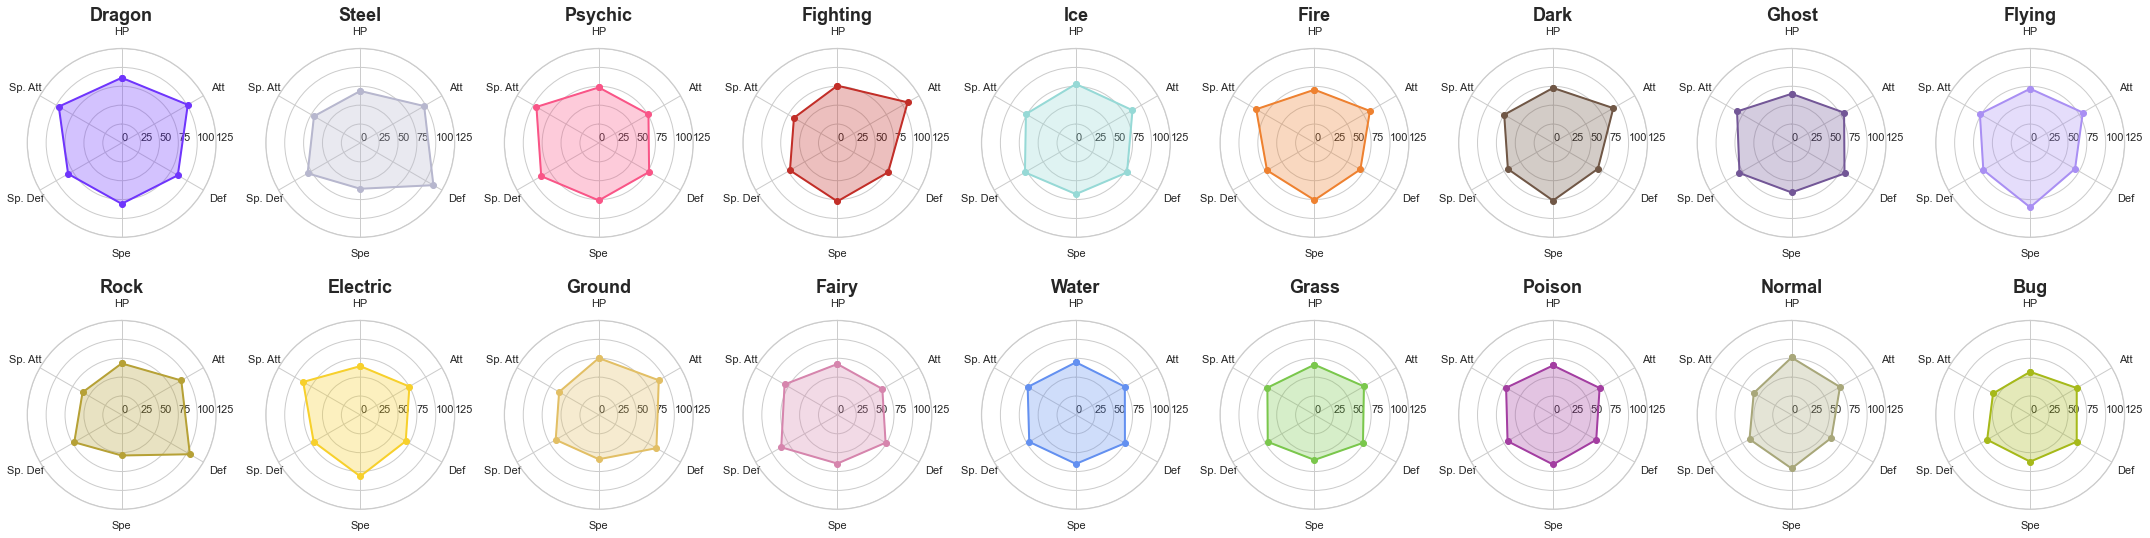

In [23]:
# Get the angles for the lables
labels = np.array(['HP','Sp. Att','Sp. Def','Spe','Def','Att'])
angles = np.linspace(0,2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))

# Setup subplot parameters
nrows = 2
ncols = 9
# Figsize is needed, but the actual values don't matter
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, nrows=nrows, ncols=ncols, figsize=(30, 30))
fig.patch.set_facecolor('white')

# Set individual color per type for plot
# Credits: https://gist.github.com/apaleslimghost/0d25ec801ca4fc43317bcff298af43c3
type_colors = {
    'Fire':     '#EE8130',
    'Water':    '#6390F0',
    'Grass':    '#7AC74C',
    'Poison':   '#A33EA1',
    'Steel':    '#B7B7CE',
    'Bug':      '#A6B91A',
    'Normal':   '#A8A77A',
    'Dark':     '#705746',
    'Electric': '#F7D02C',
    'Ground':   '#E2BF65',
    'Rock':     '#B6A136',
    'Ice':      '#96D9D6',
    'Fairy':    '#D685AD',
    'Fighting': '#C22E28',
    'Psychic':  '#F95587',
    'Ghost':    '#735797',
    'Dragon':   '#6F35FC',
    'Flying':   '#A98FF3'
}

# I chose the mean of the BST because when plotting, 
# I could plot from type with the highest total base stats to the lowest
type1 = pokedex.groupby('Type 1')['BST'].mean()
type2 = pokedex.groupby('Type 2')['BST'].mean()

# Build a datafrome for Mean BST by type
max_BST_by_type         = pd.DataFrame(type1.add(type2, fill_value=0))
max_BST_by_type         = max_BST_by_type.reset_index()
max_BST_by_type.columns = ['Type', 'Mean BST']
max_BST_by_type         = max_BST_by_type.sort_values(by='Mean BST')

# Build radar subplots
count = 0
for type in max_BST_by_type.sort_values(by='Mean BST', ascending=False)['Type']:

    # As we iterate through the type column, we look at the type of both typnig columns for a match
    # If there is a match, we add the the stats under that type
    stats_by_type       = pokedex[((pokedex['Type 1']==type) | ((pokedex['Type 2'])==type))][['HP', 'Att', 'Def', 'Spa', 'Spd', 'Spe']]
    mean_stats_by_type  = stats_by_type.mean(axis=0)

    # Calculate the subplot position
    plt_col =  count % ncols            # When count is 9: we reset back to col 0
    plt_row = (count-plt_col) // ncols  # When count is 9: we reset to row 1
    print(f'Plot Name: {type:<10} Column: {plt_col} Row: {plt_row}')
    
    # Radar map goes counter clockwise, radar maps are modeled after ingame radar maps so we change the ordering to match
    # HP, Sp. Atk, Sp. Def, Spe, Def, Atk
    stats = [mean_stats_by_type.values[0], mean_stats_by_type.values[3], mean_stats_by_type.values[4], mean_stats_by_type.values[5], mean_stats_by_type.values[2], mean_stats_by_type.values[1]]
    stats = np.concatenate((stats,[stats[0]]))
    
    # Format the subplot
    # This is a wrapper for theta offset, but it means we don't have to calculate the radians ourselves
    ax[plt_row,plt_col].set_theta_zero_location("N")
    ax[plt_row,plt_col].plot(angles, stats, 'o-', linewidth=2, color=type_colors[type])
    ax[plt_row,plt_col].fill(angles, stats, alpha=0.3, color=type_colors[type])
    ax[plt_row,plt_col].set_rticks([0,25,50,75,100,125])
    ax[plt_row,plt_col].set_rlabel_position(-90.0)
    # The math here is done to get the proper angle for each stat based on number of labels and pi
    # We do it this way because the radar plot is a circle and we can find the angles within a circle using pi
    ax[plt_row,plt_col].set_thetagrids((angles * 180/np.pi)[0:6], labels)       
    ax[plt_row,plt_col].set_title(type, fontweight='bold', fontsize= 18)
    ax[plt_row,plt_col].grid(True)

    count += 1
    
    plt.tight_layout()
# end for
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.tight_layout()

plt.show()
plt.close()

The radar plots are ordered by highest mean base stat total (BST). Dragon type is a heavily favored type, followed by Steel and Psychic. I assume psychic is high on the list because it has the highest count of legendaries. Bug type seems to be the overall weakest type and most non legendary type too.

## Setup Training Data

In [24]:
#Separate the dataset as features and label
X=final_pokedex.drop(['Legendary'], axis=1)
y=final_pokedex['Legendary']
print("Datataset has {} samples with {} features".format(*X.shape))

X.head()

Datataset has 1032 samples with 15 features


,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Height,Weight
0,0.173228,0.237838,0.195556,0.298913,0.214286,0.205128,0.236364,0.236364,0.083718,0.000000,0.8,0.442173,0.0,0.030151,0.006801
1,0.232283,0.308108,0.257778,0.380435,0.285714,0.282051,0.380165,0.380165,0.086249,0.000000,0.8,0.442173,0.0,0.045226,0.012903
2,0.311024,0.416216,0.346667,0.489130,0.380952,0.384615,0.578512,0.578512,0.086249,0.000000,0.8,0.442173,1.0,0.095477,0.099920
3,0.311024,0.513514,0.524444,0.608696,0.476190,0.384615,0.743802,0.743802,0.181635,0.714286,0.8,0.442173,1.0,0.115578,0.155431
4,0.149606,0.254054,0.168889,0.271739,0.142857,0.307692,0.221488,0.221488,0.087151,0.000000,0.8,0.442173,0.0,0.025126,0.008402


In [25]:
#Split data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## Unsupervised Learning

### Models

#### KMeans Cluster
>In K-means, each cluster is represented by its center (called a “centroid”), which corresponds to the arithmetic mean of data points assigned to the cluster.

c:\Users\Angel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


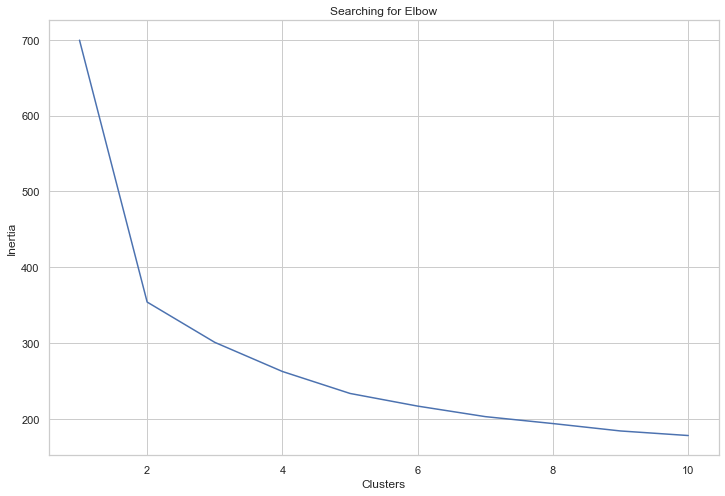

In [26]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

The most obvious elbow occurs at two. Considering our classification is binary, I will go with two clusters for modeling.

In [27]:
n_clusters=2

kmeans = KMeans(n_clusters=n_clusters)

kmeans.fit(X)

# label each feature vector with a cluster identifier
labels = kmeans.labels_
print(labels[:50], '\n')

# coordinates of the cluster centers in the 30-dimensional feature space
centers = kmeans.cluster_centers_


np.set_printoptions(precision=2)
print('Center of cluster 0: \n{}\n'.format(centers[0]))
print('Center of cluster 1: \n{}\n'.format(centers[1]))

[1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 0] 

Center of cluster 0: 
[0.32 0.49 0.37 0.43 0.32 0.39 0.57 0.57 0.23 0.51 0.72 0.46 1.   0.08
 0.11]

Center of cluster 1: 
[2.10e-01 2.98e-01 2.35e-01 2.32e-01 1.61e-01 2.48e-01 2.60e-01 2.60e-01
 1.54e-01 4.63e-01 6.79e-01 4.24e-01 4.44e-16 3.07e-02 2.44e-02]



We will reeduce the dimensionality to speed things up (hopefully)

In [28]:
pca = PCA(n_components=2)

pca_reduced_features = pca.fit_transform(X)

pca_reduced_features.shape

(1032, 2)

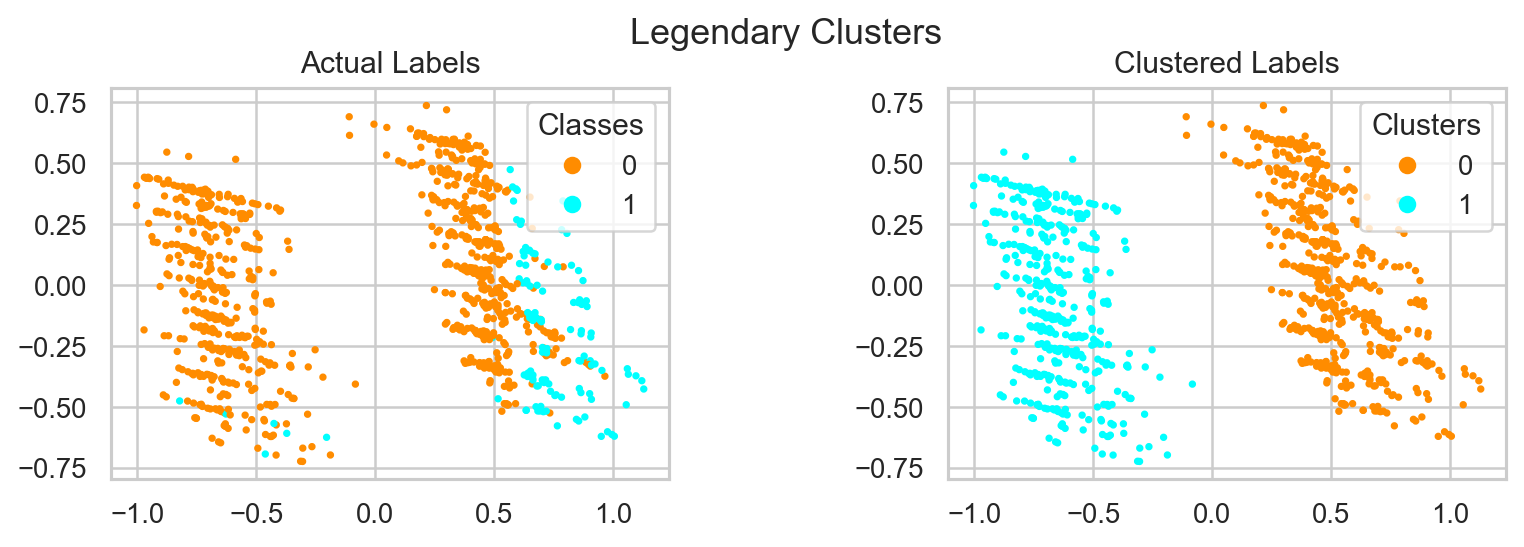

In [29]:
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['darkorange', 'c', 'blue', 'darkred', 'lime', 'cyan'])


fig, subplots = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('Legendary Clusters')
fig.subplots_adjust(top=0.85, wspace=0.5)

subplots[0].set_title('Actual Labels')
subplots[1].set_title('Clustered Labels')

x1 = pca_reduced_features[:, 0]
x2 = pca_reduced_features[:, 1]

scatter = subplots[0].scatter(x1, x2, c=y, marker='.', s=15, cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
subplots[0].legend(*scatter.legend_elements(), loc="upper right", title="Classes")


scatter = subplots[1].scatter(x1, x2, c=labels, marker='.', s=15, cmap=cmap_bold)

# produce a legend with the unique colors from the scatter
subplots[1].legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
plt.show()

Using the graphs, we can see that it will be nearly impossible to perfectly predict whether a Pokemon is Legendary or not due to how intertwined some of the actual Legendaries are with the non-legendaries.

In [30]:
accuracy_score(y, labels)

0.45542635658914726

This is a side note for the highest accuracy score during my testing.

Highest ACC: 54.5%

## Supervised Learning

### Models

#### KNN
>In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor

#### Support Vector Machine
>The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

#### Random Forest Classifier
>Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes the model’s prediction.

#### Linear SVC
>The objective of a Linear SVC is to fit to the data you provide a "best fit" hyperplane that divides, or categorizes, your data.

#### Extra Trees Classifier
>Extra Trees is like Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not use bootstrap, and nodes are split on random splits.

#### MLP Classifier
>The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one.

K-Neighbors Classifier   | Accuracy=0.934 Mean=-0.056 STD=0.022
                         | Mean squared error: 0.066
                         | Root Mean squared error: 0.2566933440278829


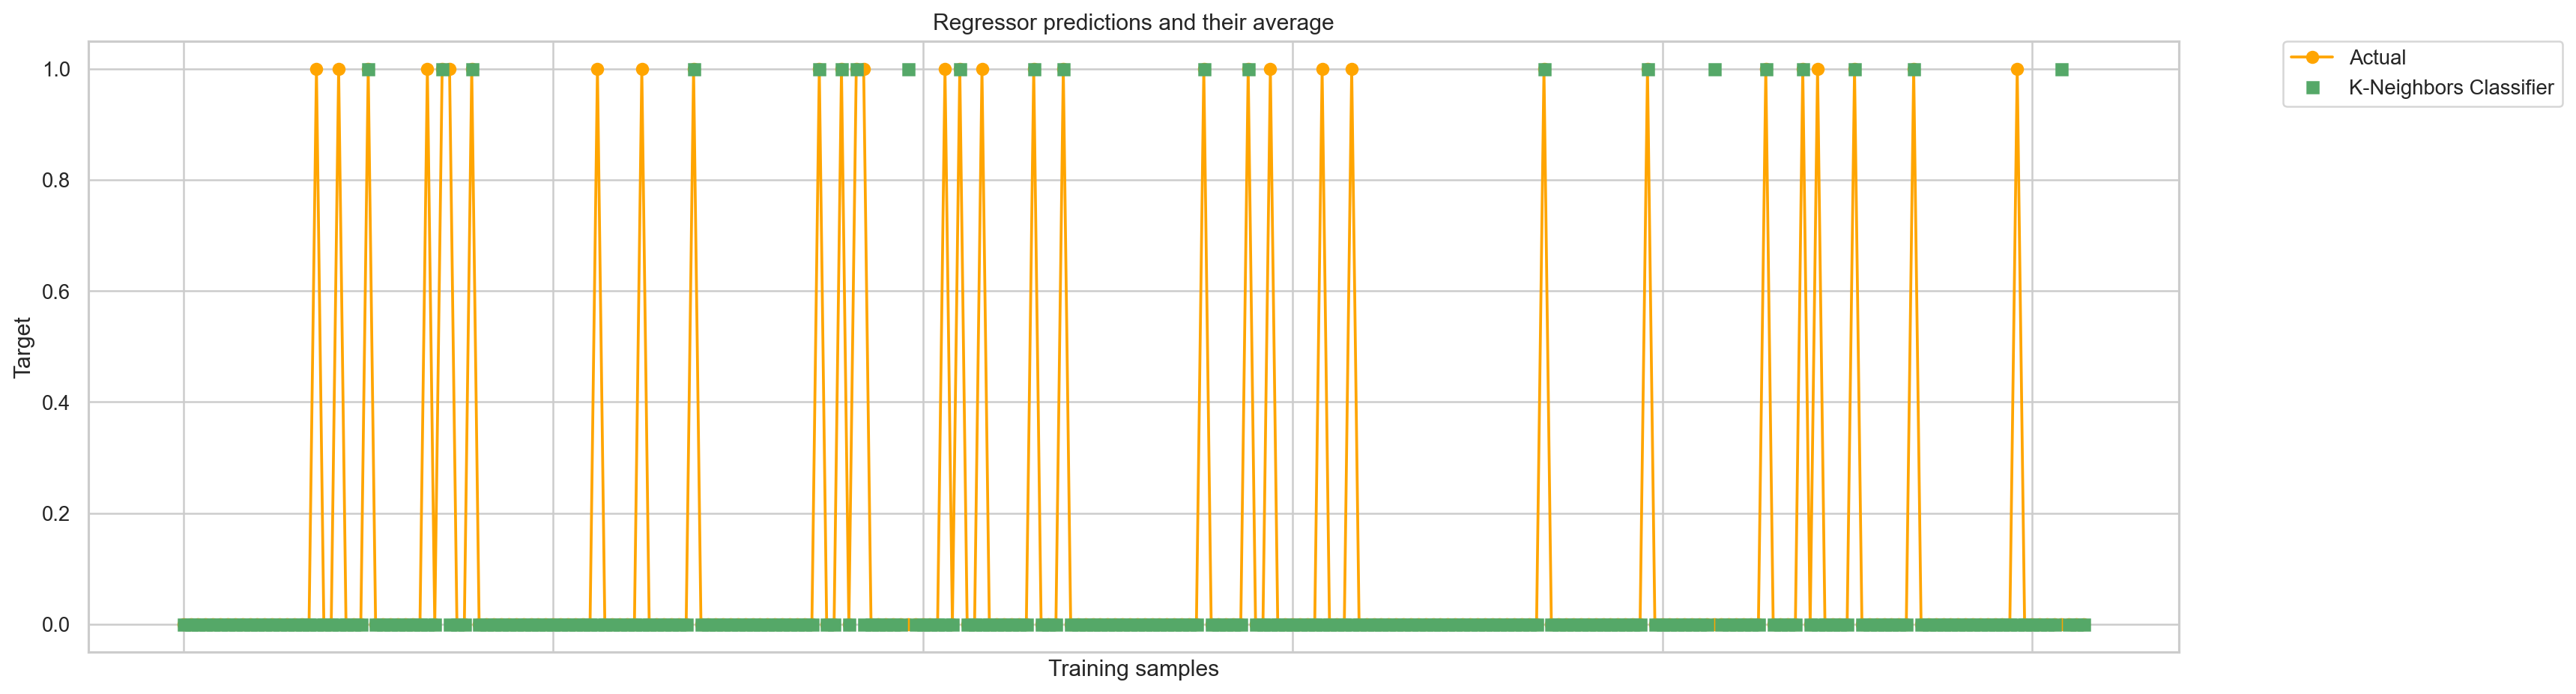

Support Vector Machine   | Accuracy=0.950 Mean=-0.041 STD=0.021
                         | Mean squared error: 0.050
                         | Root Mean squared error: 0.22447181760574045


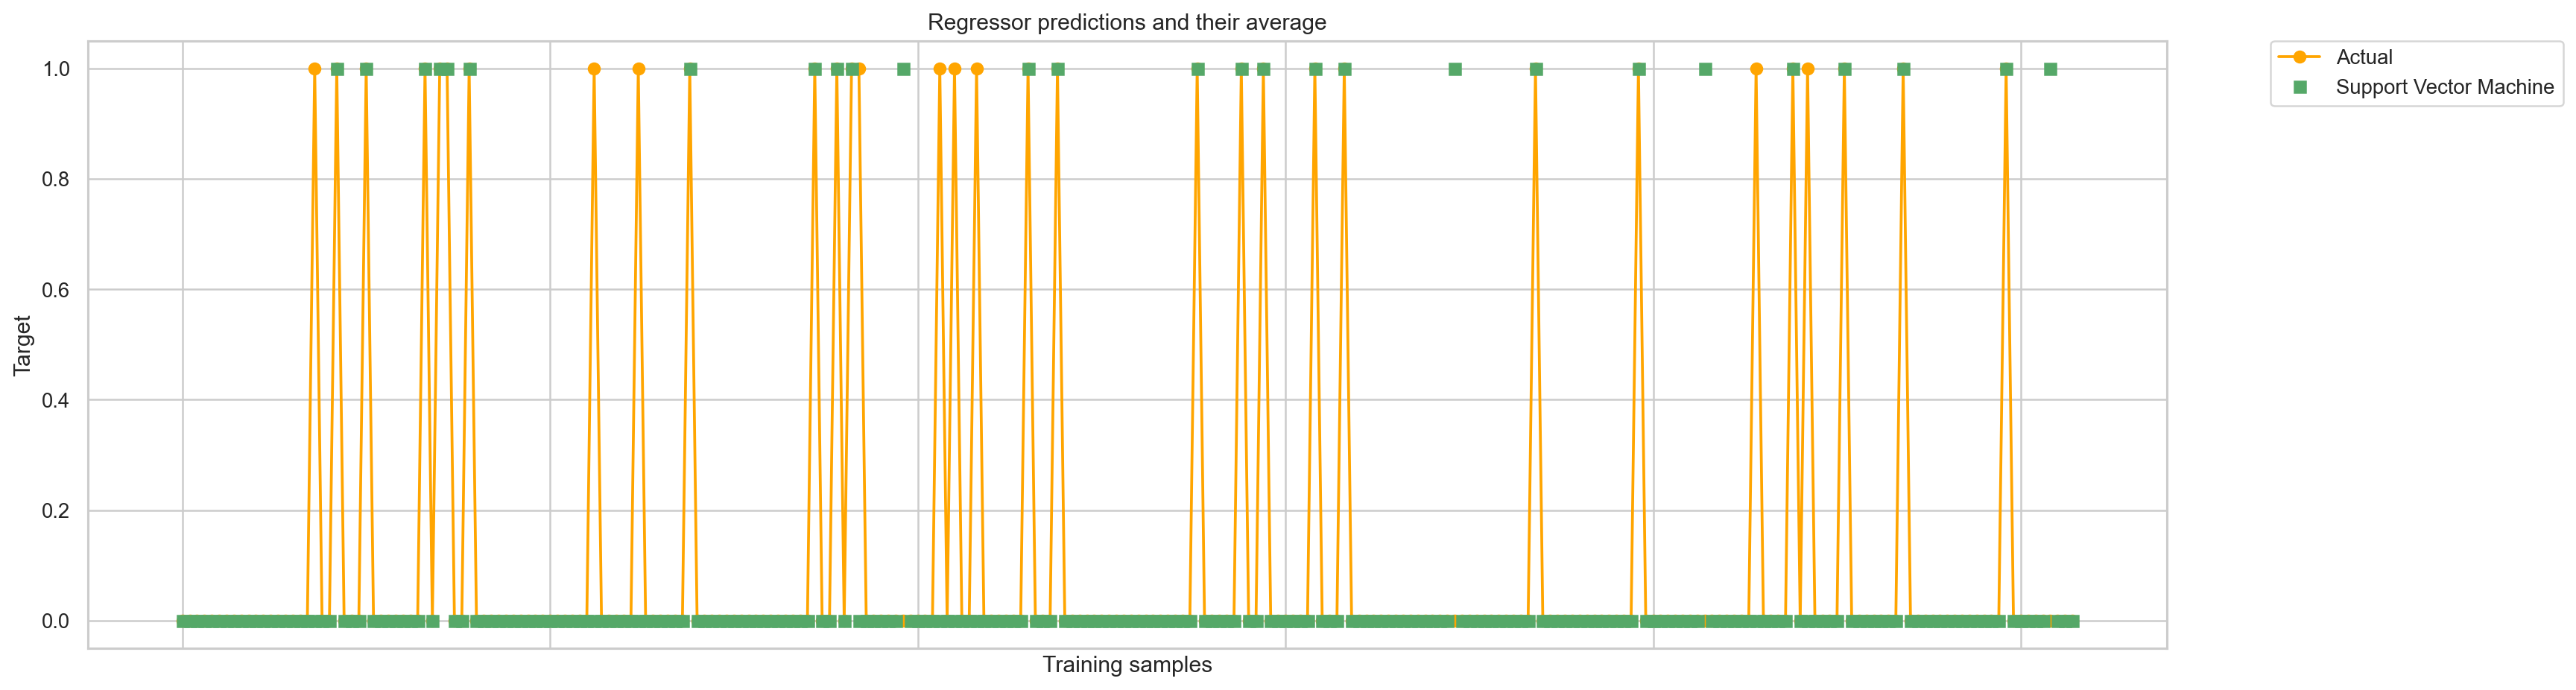

Random Forest Classifier | Accuracy=0.965 Mean=-0.030 STD=0.015
                         | Mean squared error: 0.035
                         | Root Mean squared error: 0.1867718419094071


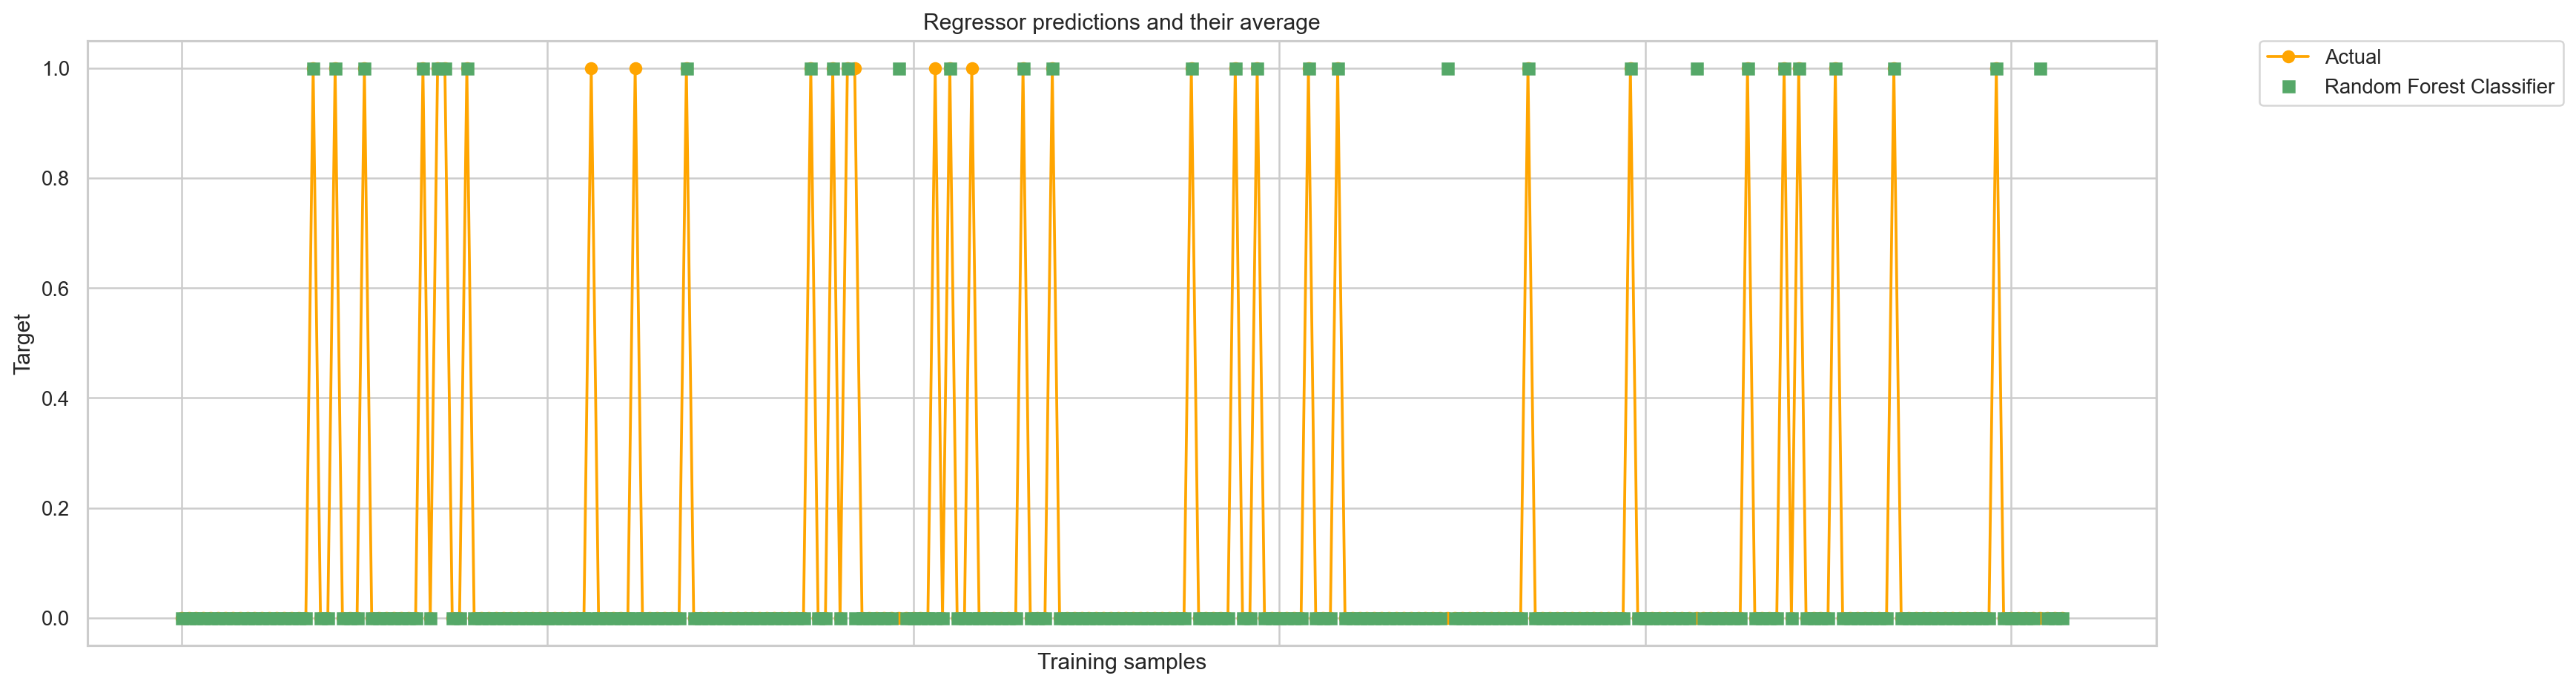

In [31]:
# These will be used for the remainder of the notebook
n_folds = 10
scoring = 'neg_mean_squared_error'

# Everything except target variable
X = final_pokedex.drop(['Legendary'], axis=1)

# Target variable
y = final_pokedex['Legendary'].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Defining Learning Model
models = [
    (KNeighborsClassifier(n_neighbors=4),'K-Neighbors Classifier'),
    (SVC(),"Support Vector Machine"),
    (RandomForestClassifier(),'Random Forest Classifier'),
]

for model, model_name in models:
    model.fit(X_train,y_train)
    accuracy=model.score(X_test, y_test)
    cv_results = cross_val_score(model, X_train, y_train, scoring=scoring,cv=n_folds)
   
    # make predictions on the testing set
    y_pred= model.predict(X_test)
    
    print(f'{model_name:<25}| Accuracy={accuracy:.3f} Mean={cv_results.mean():.3f} STD={cv_results.std():.3f}')
    print(f'{"":<25}| Mean squared error: {mean_squared_error(y_test, y_pred):.3f}')
    print(f'{"":<25}| Root Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

    plt.figure(figsize=(20,6))
    plt.plot(y_test, color='orange', marker='o', label='Actual')
    plt.plot(y_pred, 'gs', label=model_name)

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.ylabel('Target')
    plt.xlabel('Training samples')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regressor predictions and their average')

    plt.show()
# end for

The graphs are unfortunately a little funky looking because of the binary nature of our classification label. However, very nice results!

## Classifier Ensemble

Since we just covered this process in class, I figured I would throw it in to see if I could get some better results.

In [32]:
# Validation Set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=.2, random_state=42)

# Test Set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=.2, random_state=42)

In [33]:
# Setup Model Parameters
random_forest_clf   = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf     = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf             = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf             = MLPClassifier(random_state=42)

In [34]:
# List of models and their respective names for iterative purposes
estimators      = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
estimator_names = ['Random Forest Classifier', 'Extra Trees Classifier', 'Linear SVC', 'MLP Classifier']

In [35]:
# Train Models
idx = 0
for estimator in estimators:
    print(f'Training: {estimator_names[idx]}')
    # Train model
    estimator.fit(X_train, y_train)
    idx += 1
# end for

Training: Random Forest Classifier
Training: Extra Trees Classifier
Training: Linear SVC
Training: MLP Classifier


c:\Users\Angel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Display Scores of each model
idx = 0
for estimator in estimators:
    print(f'Model: {estimator_names[idx]: <25} Score: {estimator.score(X_val, y_val): .4f}')
    idx += 1
# end for

Model: Random Forest Classifier  Score:  0.9758
Model: Extra Trees Classifier    Score:  0.9758
Model: Linear SVC                Score:  0.8970
Model: MLP Classifier            Score:  0.9515


Looks like the lowest performer was SVC, again. The last few assignments showed it as one of the lowest performers too. Very intteresting!

In [37]:
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("extra_trees_clf", extra_trees_clf),
    ("svm_clf", svm_clf),
    ("mlp_clf", mlp_clf),
]

voting_clf = VotingClassifier(named_estimators)

voting_clf.fit(X_train, y_train)
print() # Silence output

c:\Users\Angel\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Display Ensemble score 
ens_score = voting_clf.score(X_val, y_val)
print(f'Ensemble Score: {ens_score}')

Ensemble Score: 0.9515151515151515


In [39]:
# "Turn off" lowest performing models
voting_clf.set_params(svm_clf=None)

# Remove Trained Estimators
# We have to reference the same index due to order of operations
del voting_clf.estimators_[2]   # SVM

# Show remaining estimators
print(voting_clf.estimators_)

[RandomForestClassifier(random_state=42), ExtraTreesClassifier(random_state=42), MLPClassifier(random_state=42)]


In [40]:
voting_type = ['soft', 'hard']

for type in voting_type:
    voting_clf.voting = type

    # Display Ensemble score 
    ens_score = voting_clf.score(X_val, y_val)
    print(f'Ensemble Score ({type.title()}): {ens_score:.4f}')


Ensemble Score (Soft): 0.9697
Ensemble Score (Hard): 0.9758


Dropping SVC and keeping to hard voting yields the highest result I've seen yet.

---

This actually changes when I re-run it... This makes my above statement false sometimes :(

Highest Score Seen: 98.9%

## Closing Thoughts

I actually went through about half a dozen or so different datasets to get one that not only performed the best, but was also most complete. The reason I wanted a mostly complete set was to avoid reducing my already somewhat small dataset. There is only a max of a little over 1,000 Pokemon including variant forms. Knowing that ML relies on data, but also quality of data, I got picky. 

The hardest part of this assignment, for me, was getting the Type radar plots to plot correctly. I stumbpled through that section for about 4 hours before I was able to make it work. Totally worth it though as it provided some interesting insight.

Things I would do differently include scraping my own dataset to use. I would do this to ensure I get all the features I want since not one dataset had all the features that exist for a Pokemon or would have on or more columns for categorical features. For example, in one dataset the legendary feature was part of a categorical feature that included other categories like mythic. When using that dataset, I had to create my own binary feature akin to the one that exists in the final datatset I chose.